<a href="https://colab.research.google.com/github/msparrowskyIT/python_data_visualisation_lecture/blob/master/Exercise_5_solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

**1.**

In [0]:
salaries_df = pd.read_csv("Salaries.csv")
salaries_df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


**2.**

In [0]:
salaries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
Id                  148654 non-null int64
EmployeeName        148654 non-null object
JobTitle            148654 non-null object
BasePay             148045 non-null float64
OvertimePay         148650 non-null float64
OtherPay            148650 non-null float64
Benefits            112491 non-null float64
TotalPay            148654 non-null float64
TotalPayBenefits    148654 non-null float64
Year                148654 non-null int64
Notes               0 non-null float64
Agency              148654 non-null object
Status              0 non-null float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


**3.**

In [0]:
salaries_df['BasePay'].mean()

66325.4488404877

**4.**

In [0]:
salaries_df['OvertimePay'].max()

245131.88

**5.**

In [0]:
salaries_df.loc[salaries_df['EmployeeName'] == 'JOSEPH DRISCOLL']['JobTitle']

24    CAPTAIN, FIRE SUPPRESSION
Name: JobTitle, dtype: object

**6.**

In [0]:
salaries_df.loc[salaries_df['EmployeeName'] == 'JOSEPH DRISCOLL']['TotalPayBenefits']

24    270324.91
Name: TotalPayBenefits, dtype: float64

**7.**

In [0]:
salaries_df.loc[salaries_df['TotalPayBenefits'].idxmax()]['EmployeeName']

'NATHANIEL FORD'

**8.**

In [0]:
salaries_df.loc[salaries_df['TotalPayBenefits'].idxmin()]['EmployeeName']
# Niektórzy najwidoczniej lubią dzielić się pieniędzmi z pracodawcą :)

'Joe Lopez'

**9.**

In [0]:
years_df = salaries_df.loc[(2011 <= salaries_df['Year']) & (salaries_df['Year'] <= 2014)]
years_df.groupby(['Year'])['BasePay'].mean()

Year
2011    63595.956517
2012    65436.406857
2013    69630.030216
2014    66564.421924
Name: BasePay, dtype: float64

**10.**

In [0]:
salaries_df['JobTitle'].nunique()


2159

**11.**

In [0]:
jobs_s = salaries_df.groupby(['JobTitle']).size()
jobs_s.sort_values(inplace = True, ascending=False)
jobs_s.head(5)

JobTitle
Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
dtype: int64

**12.**

In [0]:
year_df = salaries_df.loc[salaries_df['Year'] == 2013]
jobs_s = year_df.groupby(['JobTitle']).size()
one_jobs_s = jobs_s[jobs_s == 1]
one_jobs_s.size


202

**13.**

In [0]:
chiefs = salaries_df['JobTitle'].loc[salaries_df["JobTitle"].str.contains("Chief")]
chiefs.count()

423

**14.**

In [0]:
job_and_pay_df = salaries_df[['JobTitle', 'TotalPayBenefits']].copy()
job_and_pay_df['JobTitle'] = job_and_pay_df['JobTitle'].apply(lambda x: len(x))
job_and_pay_df.rename(columns = {'JobTitle':'JobTitle_len'}, inplace=True)
job_and_pay_df.corr()



,JobTitle_len,TotalPayBenefits
JobTitle_len,1.000000,-0.036878
TotalPayBenefits,-0.036878,1.000000


**15.**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f203a40da90>]],
      dtype=object)

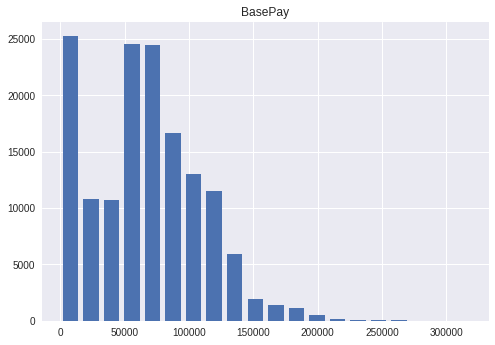

In [0]:
base_pay_df = salaries_df['BasePay']
salaries_df.hist(column='BasePay', rwidth=0.75, bins=20)
